<h1>ISE 789 HW 1 - SVM with Optimization theory</h1>
The objective of this homework is to understand the theory behind Support Vector Machine (SVM) and develop relevant optimization models in Python to seprate data into clusters through linear hyperplane. Here, we have decveloped two models: (i) 2-norm model, and (ii) linear approximation model. The models have been tested on two datsets: (i) randomly generated data, (ii) iris datasets. We have used python libraires <b>cvxpy</b> and <b>mosek</b> to solve the models. We have found that, both models have similar efficiency and accuracy in terms of clustering the datasets.
<h4> Submitted by Tanzid Hasnain </h4>
Date: September 8, 2020

<h2>Problem 1</h2>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('data1.csv')
df1.head()

,x,y,Class
0,0.130154,0.258268,-1
1,0.003548,0.137781,-1
2,0.595170,0.346281,-1
3,0.197903,0.133121,-1
4,0.651196,0.410937,-1


In [4]:
X = np.array(df1.iloc[:,:2])
label = df1['Class']
id_c1 = label[label == -1].index
id_c2 = label[label == 1].index

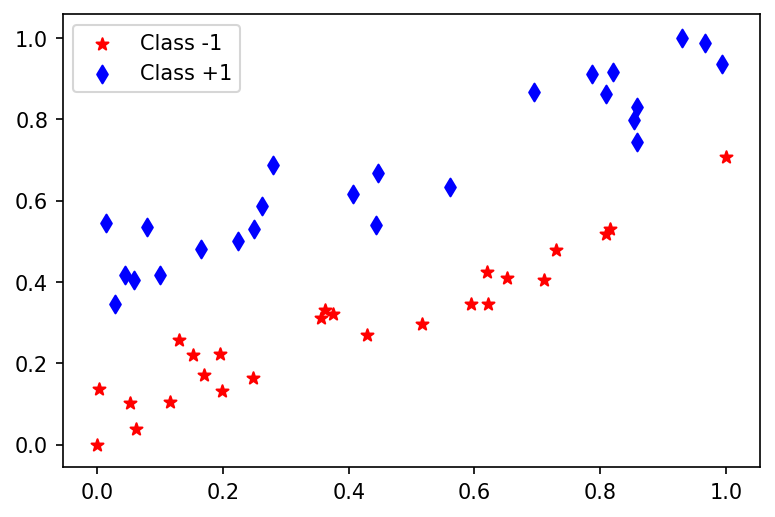

In [6]:
# Visualized the data points (not necessary)
plt.figure(dpi = 150)
plt.scatter(X[id_c1,0], X[id_c1,1], marker= '*', color = 'r', label ='Class -1')
plt.scatter(X[id_c2,0], X[id_c2,1], marker= 'd', color = 'b', label = 'Class +1')
plt.legend()
plt.show()

In [7]:
# Solve by Mosek solver
import cvxpy as cp         
import mosek              


In [8]:
N = X.shape[0]    # Number of data points
n = 2             # number of features.

# Create optimization variables w, b
vardim =  n+1
P1var = cp.Variable(vardim) # coefficient variables    P1var = [w;b] 
P1mat = np.dot(np.diag(label), np.append(X, np.ones([N,1]), axis = 1))   # coefficient matrix diag(Y)[X, ones]


In [10]:
# Create constraints.
constraints = [P1mat @ P1var >= np.ones(N)]

# Form objective.
obj = 0.5*cp.norm(P1var[:-1])

# Build and solve the problem.
problem = cp.Problem(cp.Minimize(obj), constraints)
problem.solve(solver = cp.MOSEK)

# print the solution
w = P1var[:-1].value
b = P1var[-1].value

print('optimal w {} and optimal b {}'.format(w, b))

optimal w [-9.44837001 18.2873429 ] and optimal b -4.493304154850082


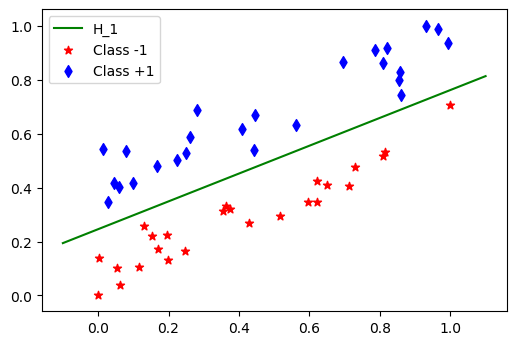

In [12]:
# Step 3 
# Visualize the optimal solution with data points. (w^T x + b = 0)
# rewrite it into slope-intercept form  y = -w1w2 x - bw2

# Visualized the data points (not necessary)
plt.figure(dpi = 100)
plt.scatter(X[id_c1,0], X[id_c1,1], marker= '*', color = 'r', label ='Class -1')
plt.scatter(X[id_c2,0], X[id_c2,1], marker= 'd', color = 'b', label = 'Class +1')
xlin = np.linspace(-0.1,1.1,20)
ylin = (-w[0]*xlin - b)/w[1]
plt.plot(xlin, ylin, color = 'g', label = 'H_1')
plt.legend()
plt.show()
#

In [17]:
# Create optimization variables w, b
vardim =  n+1
P1var = cp.Variable(vardim) # coefficient variables    P1var = [w;b] 
t_var = cp.Variable(N)
P1mat = np.dot(np.diag(label), np.append(X, np.ones([N,1]), axis = 1))   # coefficient matrix diag(Y)[X, ones]

# Create constraints.
constraints = [P1mat @ P1var + np.ones(N) @ t_var >= np.ones(N),
               t_var >= np.zeros(N)]
# Form objective.
obj = cp.sum(t_var)
# Build and solve the problem.
problem = cp.Problem(cp.Minimize(obj), constraints)
problem.solve(solver = cp.MOSEK)
# print the solution
w2 = P1var[:-1].value
b2 = P1var[-1].value
tt = t_var.value

print('optimal w {} and optimal b {}'.format(w2, b2))
print('optimal t {}'.format(tt))


optimal w [-70142.35985312 135118.68911338] and optimal b -33416.72955598739
optimal t [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.65862438e-12]


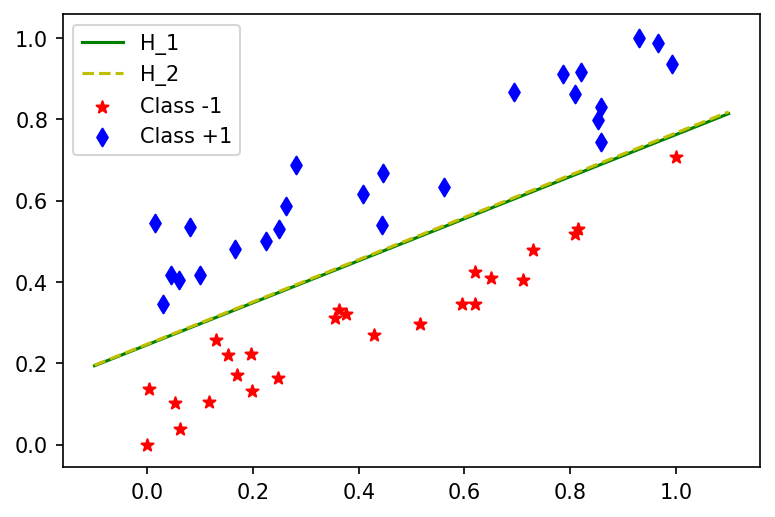

In [24]:
# Step 3 
# Visualize the optimal solution with data points. (w^T x + b = 0)
# rewrite it into slope-intercept form  y = -w1w2 x - bw2

df = pd.read_csv('data1.csv')
X = np.array(df.iloc[:,:2])         # data points
label = df['Class']                  # labels
id_c1 = label[label == -1].index   # find index of label -1
id_c2 = label[label == 1].index    # find index of label 1

# Visualized the data points (not necessary)
plt.figure(dpi = 150)
plt.scatter(X[id_c1,0], X[id_c1,1], marker= '*', color = 'r', label ='Class -1')
plt.scatter(X[id_c2,0], X[id_c2,1], marker= 'd', color = 'b', label = 'Class +1')
xlin = np.linspace(-0.1,1.1,20)
# plot H1
ylin = (-w[0]*xlin - b)/w[1]
plt.plot(xlin, ylin, color = 'g', linestyle = '-', label = 'H_1')

# plot H2
ylin = (-w2[0]*xlin - b2)/w2[1]
plt.plot(xlin, ylin, color = 'y', linestyle = '--', label = 'H_2')
plt.legend()
plt.show()
#

<h4>Observation</h4>
The linear approximation provides a similar separation of the datasets compared to the 2-norm model.

<h2>Problem 2</h2>

In [44]:
df2 = pd.read_csv('iris2c.csv')
df2.head()

,f0,f1,f2,f3,class
0,5.1,3.5,1.4,0.2,-1
1,4.9,3.0,1.4,0.2,-1
2,4.7,3.2,1.3,0.2,-1
3,4.6,3.1,1.5,0.2,-1
4,5.0,3.6,1.4,0.2,-1


In [43]:
X = np.array(df2.iloc[:,:4])
label = df2['class']
id_c1 = label[label == -1].index
id_c2 = label[label == 1].index

<h4>Part a</h4>

In [45]:
N = X.shape[0]    # Number of data points
n = 4             # number of features.

# Create optimization variables w, b
vardim =  n+1
P1var = cp.Variable(vardim) # coefficient variables    P1var = [w;b] 
P1mat = np.dot(np.diag(label), np.append(X, np.ones([N,1]), axis = 1))   # coefficient matrix diag(Y)[X, ones]

In [47]:
# Create constraints.
constraints = [P1mat @ P1var >= np.ones(N)]

# Form objective.
obj = 0.5*cp.norm(P1var[:-1])

# Build and solve the problem.
problem = cp.Problem(cp.Minimize(obj), constraints)
problem.solve(solver = cp.MOSEK)

# print the solution
w = P1var[:-1].value
b = P1var[-1].value

print('optimal w {} and optimal b {}'.format(w, b))

optimal w [ 0.04598098 -0.52169585  1.00321099  0.46411517] and optimal b -1.4504229992172966


<h4>Part b</h4>

In [49]:
# Create optimization variables w, b
vardim =  n+1
P1var = cp.Variable(vardim) # coefficient variables    P1var = [w;b] 
t_var = cp.Variable(N)
P1mat = np.dot(np.diag(label), np.append(X, np.ones([N,1]), axis = 1))   # coefficient matrix diag(Y)[X, ones]

# Create constraints.
constraints = [P1mat @ P1var + np.ones(N) @ t_var >= np.ones(N),
               t_var >= np.zeros(N)]
# Form objective.
obj = cp.sum(t_var)
# Build and solve the problem.
problem = cp.Problem(cp.Minimize(obj), constraints)
problem.solve(solver = cp.MOSEK)
# print the solution
w2 = P1var[:-1].value
b2 = P1var[-1].value
tt = t_var.value

print('optimal w {} and optimal b {}'.format(w2, b2))
print('optimal t {}'.format(tt))


optimal w [-0.35803183 -1.46530964  1.60937141  2.57906172] and optimal b -0.06627804411535487
optimal t [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 0.0000000e+00 

In [64]:
df2['estimate_for_a'] = w[0]*df2['f0'] + w[1]*df2['f1'] + w[2]*df2['f2'] + w[3]*df2['f3'] + b
df2['estimate_for_b'] = w2[0]*df2['f0'] + w2[1]*df2['f1'] + w2[2]*df2['f2'] + w2[3]*df2['f3'] + b2

In [67]:
def f_a(row):
    if row['estimate_for_a'] <= 0:
        val = -1
    else:
        val = 1
    return val

def f_b(row):
    if row['estimate_for_b'] <= 0:
        val = -1
    else:
        val = 1
    return val


def correct_a(row):
    if row['result_a'] == row['class']:
        val = 1
    else:
        val = 0
    return val

def correct_b(row):
    if row['result_b'] == row['class']:
        val = 1
    else:
        val = 0
    return val

In [69]:
df2['result_a'] = df2.apply(f_a, axis=1)
df2['result_b'] = df2.apply(f_b, axis=1)
df2['right_count_a'] = df2.apply(correct_a, axis=1)
df2['right_count_b'] = df2.apply(correct_b, axis=1)
df2.head()

,f0,f1,f2,f3,class,estimate_for_a,estimate_for_b,result_a,result_b,right_count_a,right_count_b
0,5.1,3.5,1.4,0.2,-1,-1.544537,-4.251892,-1,-1,1,1
1,4.9,3.0,1.4,0.2,-1,-1.292885,-3.447631,-1,-1,1,1
2,4.7,3.2,1.3,0.2,-1,-1.506742,-3.830023,-1,-1,1,1
3,4.6,3.1,1.5,0.2,-1,-1.258528,-3.325815,-1,-1,1,1
4,5.0,3.6,1.4,0.2,-1,-1.601305,-4.362620,-1,-1,1,1


In [72]:
accuracy_a = df2['right_count_a'].sum()
accuracy_b = df2['right_count_b'].sum()

In [75]:
print('Observation: Accuarcy for the 2-norm and the linear approximation models are {}% and {}% respectively'.format(accuracy_a, accuracy_b))

Observation: Accuarcy for the 2-norm and the linear approximation models are 100% and 100% respectively


<h4>Part d</h4>

In [61]:
import pandas as pd
import io
import requests

url="https://archive.ics.uci.edu/ml/machine-learning-databases/iris//iris.data"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')), header = None)
c.columns = ['f1','f2','f3','f4','class']
c = c.iloc[:100,:]
c.loc[c['class'] == 'Iris-setosa', 'class'] = 1
c.loc[c['class'] == 'Iris-versicolor', 'class'] = -1
c

,f1,f2,f3,f4,class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1
